### Creating an instance

In [1]:
from diffractio import degrees, mm, nm, np, plt, sp, um

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY


In [2]:
x0 = np.linspace(-2 * mm, 2 * mm, 2**13)
y0 = np.linspace(-2 * mm, 2* mm, 2**13)

wavelength = 0.78 * um

## Focused beam with high NA optics

### Axicon

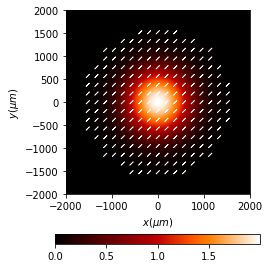

In [3]:
# define the scalar mask
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.axicon(r0=(0, 0),
          refraction_index=2.5295, # Index of ZnSe@780nm
          angle=17*np.pi/180,
          radius=2.5*mm
         )

# polarize the light
M1 = Vector_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0 * degrees)
M1.apply_scalar_mask(t1)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(1 * mm, 1 * mm),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u0, v=(1, 1))
EM0.draw('ellipses', num_ellipses=(21, 21))


In [27]:
1/np.tan(30*np.pi/180)

1.7320508075688774

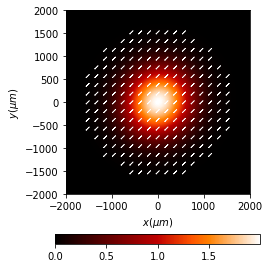

In [4]:
EM1 = EM0.VRS(z=1/np.tan(30*np.pi/180)*mm,verbose=True)
EM1.draw('ellipses', num_ellipses=(21, 21))

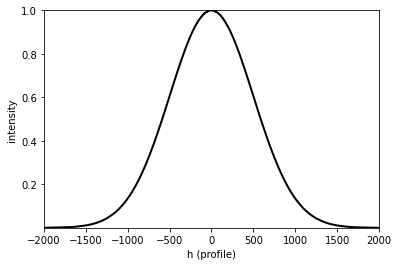

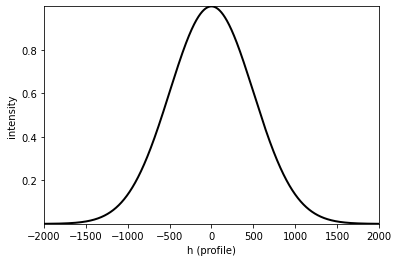

In [7]:
Ex, Ey, _ = EM1.get('fields', is_matrix=False)
Ex.draw_profile(point1=[Ex.x[0], 0], point2=[Ex.x[-1], 0])
plt.show()
Ex, Ey, _ = EM0.get('fields', is_matrix=False)
Ex.draw_profile(point1=[Ex.x[0], 0], point2=[Ex.x[-1], 0])
plt.show()

### Crossed polarization

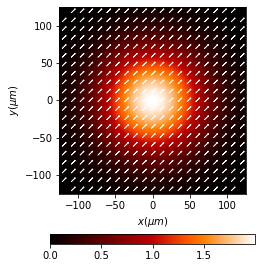

In [11]:
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.slit(x0=-40 * um, size=80 * um)
t1.square(r0=(-40, 0), size=(50, 160), angle=0)

t2 = Scalar_mask_XY(x0, y0, wavelength)
t2.slit(x0=40 * um, size=80 * um)
t2.square(r0=(40, 0), size=(50, 160), angle=0)

M1 = Vector_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0 * degrees)
M1.apply_scalar_mask(t1)

M2 = Vector_mask_XY(x0, y0, wavelength)
M2.polarizer_linear(azimuth=90 * degrees)
M2.apply_scalar_mask(t2)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(100 * um, 100 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

EM0.constant_polarization(u0, v=(1, 1))
EM0.draw('ellipses', num_ellipses=(21, 21))


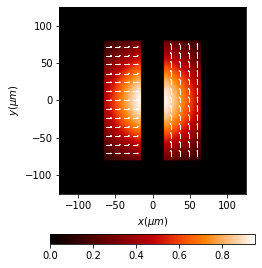

In [12]:
Et1 = EM0 * M1
Et2 = EM0 * M2

EM1 = Et1 + Et2
EM1.draw('ellipses', num_ellipses=(21, 21))


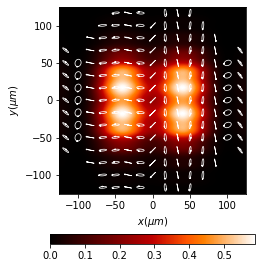

In [13]:
EM2 = EM1.VRS(z=5 * mm)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=0.6)


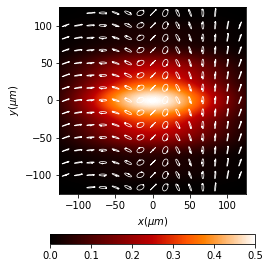

In [14]:
EM2 = EM1.VRS(z=10 * mm)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=0.6)


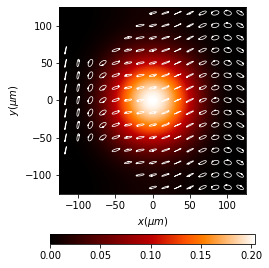

In [15]:
EM2 = EM1.VRS(z=25 * mm, amplification=(3, 1), verbose=True)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=0.6)


In [16]:
EM1?

Vector_field_XY
 - x:  (512,),     Ex:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um,  Dx:   0.49 um
 - ymin:       -125.00 um,  ymay:      125.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      0.95
 - wavelength: 0.63 um
 - date:       2023-07-07_21_35_04
 - info:       
